In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sarwansingh/Python/master/ClassExamples/data/diabetes.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#using replace functiondf
df.gender.unique()
df.replace({'gender': {'Male': 1, 'Female': 2, 'Other': 3}}, inplace=True)

<ipython-input-7-6196c23469a0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender': {'Male': 1, 'Female': 2, 'Other': 3}}, inplace=True)


In [ ]:
df.smoking_history.unique()
df.replace({'smoking_history': {'never': 1, 'No Info': 2, 'current': 3, 'former': 4, 'ever': 5, 'not current': 6}}, inplace=True)

<ipython-input-8-0d77883e6549>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoking_history': {'never': 1, 'No Info': 2, 'current': 3, 'former': 4, 'ever': 5, 'not current': 6}}, inplace=True)


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80.0,0,1,1,25.19,6.6,140,0
1,2,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,2,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0


In [ ]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
79902,1,70.0,0,0,1,27.32,6.0,80,0
48505,1,66.0,1,0,3,24.33,7.0,260,1
54811,1,47.0,0,0,3,30.54,5.7,80,0
86496,2,30.0,0,0,2,32.95,6.0,145,0
97675,2,55.0,0,0,4,25.84,6.5,159,0


In [ ]:
df.groupby('diabetes').size()

,0
diabetes,
0,91500
1,8500


In [ ]:
#find the missing values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# **EDA(Exploratory Data Analysis)**

In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


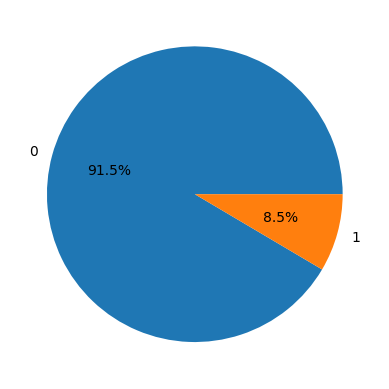

In [ ]:
plt.pie(df['diabetes'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,1.591552,40.115187,0.058984,0.029235,2.281279,26.887163,5.396761,132.852470
1,1.524824,60.946588,0.245647,0.149059,2.583294,31.988382,6.934953,194.094706


In [ ]:
#separting the data and labels
x = df[['gender',	'age'	,'hypertension'	,'heart_disease',	'smoking_history'	,'bmi'	,'HbA1c_level',	'blood_glucose_level']]
y = df['diabetes']


In [ ]:
print(x)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           2  80.0             0              1                1  25.19   
1           2  54.0             0              0                2  27.32   
2           1  28.0             0              0                1  27.32   
3           2  36.0             0              0                3  23.45   
4           1  76.0             1              1                3  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       2  80.0             0              0                2  27.32   
99996       2   2.0             0              0                2  17.37   
99997       1  66.0             0              0                4  27.83   
99998       2  24.0             0              0                1  35.42   
99999       2  57.0             0              0                3  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc.fit(x)

StandardScaler()

In [ ]:
standarized_data = sc.transform(x)

In [ ]:
print(standarized_data)

[[ 8.40111264e-01  1.69270354e+00 -2.84439447e-01 ... -3.21055792e-01
   1.00170572e+00  4.77042159e-02]
 [ 8.40111264e-01  5.38006427e-01 -2.84439447e-01 ... -1.15583678e-04
   1.00170572e+00 -1.42620999e+00]
 [-1.18855498e+00 -6.16690686e-01 -2.84439447e-01 ... -1.15583678e-04
   1.61108022e-01  4.89878478e-01]
 ...
 [-1.18855498e+00  1.07094356e+00 -2.84439447e-01 ...  7.67292549e-02
   1.61108022e-01  4.16182767e-01]
 [ 8.40111264e-01 -7.94336396e-01 -2.84439447e-01 ...  1.22036126e+00
  -1.42668764e+00 -9.34905254e-01]
 [ 8.40111264e-01  6.71240710e-01 -2.84439447e-01 ... -7.36921977e-01
   1.00170572e+00 -1.18055762e+00]]


In [ ]:
x = standarized_data
y = df['diabetes']

In [ ]:
print(x)
print(y)

[[ 8.40111264e-01  1.69270354e+00 -2.84439447e-01 ... -3.21055792e-01
   1.00170572e+00  4.77042159e-02]
 [ 8.40111264e-01  5.38006427e-01 -2.84439447e-01 ... -1.15583678e-04
   1.00170572e+00 -1.42620999e+00]
 [-1.18855498e+00 -6.16690686e-01 -2.84439447e-01 ... -1.15583678e-04
   1.61108022e-01  4.89878478e-01]
 ...
 [-1.18855498e+00  1.07094356e+00 -2.84439447e-01 ...  7.67292549e-02
   1.61108022e-01  4.16182767e-01]
 [ 8.40111264e-01 -7.94336396e-01 -2.84439447e-01 ...  1.22036126e+00
  -1.42668764e+00 -9.34905254e-01]
 [ 8.40111264e-01  6.71240710e-01 -2.84439447e-01 ... -7.36921977e-01
   1.00170572e+00 -1.18055762e+00]]
0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y, random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(100000, 8) (80000, 8) (20000, 8)


# **Train the model**

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_train)
print(accuracy_score(y_train,y_pred1))
print(confusion_matrix(y_train,y_pred1))
print(precision_score(y_train,y_pred1))

0.90395
[[67943  5257]
 [ 2427  4373]]
0.4541017653167186


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_train)
print(accuracy_score(y_train,y_pred3))
print(confusion_matrix(y_train,y_pred3))
print(precision_score(y_train,y_pred3))

0.9137125
[[70858  2342]
 [ 4561  2239]]
0.48875791311940625


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
bnb=BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':bnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.8602, 0.1734207389749702)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
  print("For",name)
  print("Accuracy-",current_accuracy)
  print("Precision-",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy- 0.8602
Precision- 0.1734207389749702
For KN
Accuracy- 0.96315
Precision- 0.8855084067253803
For NB
Accuracy- 0.9142
Precision- 0.492831541218638
For DT
Accuracy- 0.97325
Precision- 1.0
For LR
Accuracy- 0.9611
Precision- 0.8676236044657097
For RF
Accuracy- 0.97155
Precision- 0.9442262372348782


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy- 0.9734
Precision- 0.9747967479674797
For BgC
Accuracy- 0.97015
Precision- 0.9168556311413454
For ETC
Accuracy- 0.96915
Precision- 0.910538286580743
For GBDT
Accuracy- 0.9733
Precision- 1.0
For xgb
Accuracy- 0.9733
Precision- 0.9747557003257329


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Assuming you already have x_test_prediction and y_test
test_data_precision = precision_score(y_test, x_test_prediction)
print('Precision score of the test data:', test_data_precision)

Precision score of the test data: 0.7028985507246377


In [ ]:
train_data_precision = precision_score(y_train, x_train_prediction)
print('Precision score of the train data:',train_data_precision)

Precision score of the train data: 1.0


In [ ]:
#accuracy score on the train data
x_train_prediction = dt_classifier.predict(x_train)
train_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy score of the train data :',train_data_accuracy)

Accuracy score of the train data : 0.9991875


In [ ]:
#accuracy score on the test data
x_test_prediction = dt_classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print('Accuracy score of the test data :',test_data_accuracy)

Accuracy score of the test data : 0.9514


In [ ]:
input = (1	,66.0,	1,	0,	3,	24.33,	7.0,	260	)
input_as_numpy_array = np.asarray(input)
input_data_reshaped = input_as_numpy_array.reshape(1,-1)
std_data = sc.transform(input_data_reshaped)
print(std_data)
prediction = dt_classifier.predict(std_data)
print(prediction)
if (prediction[0]==0):
  print('the person is not diabetic')
else:
  print('the person is diabetic')


[[-1.18855498  1.07094356  3.51568677 -0.20257766  0.47648885 -0.45063728
   1.3753047   2.99553263]]
[1]
the person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
min_value=df["bmi"].min()
max_value=df["bmi"].max()
print(f"Minimum value in column 'bmi': {min_value}")
print(f"Maximum value in column 'bmi': {max_value}")

Minimum value in column 'bmi': 10.01
Maximum value in column 'bmi': 95.69


In [ ]:
min_value=df["HbA1c_level"].min()
max_value=df["HbA1c_level"].max()
print(f"Minimum value in column 'HbA1c_level': {min_value}")
print(f"Maximum value in column 'HbA1c_level': {max_value}")

Minimum value in column 'HbA1c_level': 3.5
Maximum value in column 'HbA1c_level': 9.0


In [ ]:
min_value=df["blood_glucose_level"].min()
max_value=df["blood_glucose_level"].max()
print(f"Minimum value in column 'blood_glucose_level': {min_value}")
print(f"Maximum value in column 'blood_glucose_level': {max_value}")

Minimum value in column 'blood_glucose_level': 80
Maximum value in column 'blood_glucose_level': 300


In [ ]:
min_value=df["age"].min()
max_value=df["age"].max()
print(f"Minimum value in column 'age': {min_value}")
print(f"Maximum value in column 'age': {max_value}")

Minimum value in column 'age': 0.08
Maximum value in column 'age': 80.0
